# **Lab Assignment One: Exploring Table Data**

***Logan Choi***

### **1. Business Understanding**

The **Adult Income Dataset** is used to predict whether a person earns more than $50K per year based on various demographic and personal factors. This prediction can be used for various purposes such as targeted marketing, social services planning, and understanding income disparities across different groups.

The dataset includes 32,561 observations and 15 features, with a mix of categorical and numerical data. These features include age, education level, occupation, marital status, hours worked per week, and more. By analyzing this dataset, we can gain insights into which demographic factors have a significant impact on a person’s income.

#### Prediction Task:
The primary prediction task of the **Adult Income Dataset** is to predict if a person earns more than $50,000 annually based on the demographic and personal attributes provided. This is a **binary classification** problem, where the target variable is the income label ("<=50K" or ">50K").

#### Business Value:
- **Targeted Marketing**: Companies can use this analysis to identify high-income earners who may be more likely to invest in premium products or services. This helps optimize marketing campaigns.
- **Policy and Research**: Governments or research organizations might be interested in understanding income inequality, and this dataset can be used to inform policies that promote economic equality, like taxation or education access.
- **Social Programs**: Non-profits and social service organizations could use insights from this analysis to design programs that better target lower-income populations or provide skill development opportunities for those earning below $50K.

By analyzing this data, we can better understand which factors contribute to higher income levels and how they can be leveraged to improve social, educational, and business strategies. For third parties, such as businesses or policymakers, a model with a high accuracy rate could be particularly useful for identifying individuals who may benefit from specific interventions or services.

#### Expected Outcome:
The performance of the prediction algorithm would need to be accurate enough to confidently identify groups at risk of earning above or below the $50K threshold. A useful model would provide actionable insights for businesses or social programs by determining significant income influencers.

========================================================================

Dataset: Adult Income Dataset URL: https://www.kaggle.com/datasets/uciml/adult-census-income  

Question Of Interest: Which demographic and personal factors most influence whether an individual earns more than $50K annually?



In [1]:
# load the income dataset
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('/Users/loganchoi/Desktop/Adult-Income-Analysis/data/adult.csv') 

df.head()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


The income feature in the original dataset contains categorical values:

<=50K and >50K.
These represent whether the individual earns less than or equal to 50K, or more than 50K, respectively. To make the analysis more convenient, we replaced these string categories with numerical values:

<=50K is replaced with 0

\>50K is replaced with 1.

In [2]:
# Check for missing values
missing_data = df.isnull().sum()
print("Missing Values:")
print(missing_data[missing_data > 0])


Missing Values:
Series([], dtype: int64)


Initially, the dataset seemed to have no missing values, as the isnull().sum() method returned an empty result. However, this is a misrepresentation of the data because the ? values in some columns are acting as placeholders for missing data, rather than being recognized as NaN (Not a Number) values by pandas.

In [3]:
# Replace all '?' values with NaN
df.replace('?', np.nan, inplace=True)
# Check for missing values after replacement
missing_data = df.isnull().sum()
print("Missing Values:")
print(missing_data[missing_data > 0])

Missing Values:
workclass         1836
occupation        1843
native.country     583
dtype: int64


To correctly identify the missing data, I replaced all ? values with NaN. After this replacement, we can accurately detect and address the missing values. This allows for a proper understanding of the quality of the data and helps in deciding how to handle the missing entries, either through imputation or elimination.

In [4]:
# Handle missing values (e.g., using mode for categorical features and median for numerical features)
df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)
df['native.country'].fillna(df['native.country'].mode()[0], inplace=True)
# df['fnlwgt'].fillna(df['fnlwgt'].median(), inplace=True)

missing_data = df.isnull().sum()
print("Missing Values:")
print(missing_data[missing_data > 0])

Missing Values:
Series([], dtype: int64)


Missing values in the dataset were handled using appropriate imputation strategies based on the type of feature (categorical or numerical).

In [5]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")


Number of duplicate rows: 24


In [6]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Check again
duplicate_rows = df.duplicated().sum()

# Print the number of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


Remove the 24 duplicate rows

In [7]:
# find the data summary
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
import pandas as pd

data_des = pd.DataFrame()

data_des['Features'] = df.columns
data_des['Description'] = [
    'The age of the individual',
    'Type of employment (e.g., Private, Self-Employed)',
    'The number of people the observation represents (final weight)',
    'Highest level of education achieved',
    'Numerical indicator of the education level',
    'Marital status of the individual',
    'Occupation of the individual (e.g., Exec-managerial, Craft-repair)',
    'Relationship status (e.g., Husband, Wife)',
    'Race of the individual (e.g., White, Black)',
    'Gender of the individual (e.g., Male, Female)',
    'Income from capital gains (e.g., from investments)',
    'Losses from capital investments',
    'The number of hours worked per week',
    'Country of origin (e.g., United States, Canada)',
    'Whether the individual earns more than 50K annually or not (target variable)'
]

data_des['Scales'] = [
    'ratio', 'nominal', 'ratio', 'ordinal', 'ordinal', 'nominal', 'nominal',
    'nominal', 'nominal', 'nominal', 'ratio', 'ratio', 'ratio', 'nominal', 'ordinal'
]

data_des['Discrete\Continuous'] = [
    'discrete', 'discrete', 'continuous', 'ordinal', 'ordinal', 'discrete',
    'discrete', 'discrete', 'discrete', 'discrete', 'continuous', 'continuous',
    'continuous', 'discrete', 'discrete'
]

data_des['Range'] = [
    '17 - 90', 'Private, Self-Employed, Gov', 'Less than 1K - 100M', '1: Bachelors, 2: Masters, 3: PhD, etc.',
    '1 - 16', 'Divorced, Married, Never-married, Widowed',
    'Exec-managerial, Craft-repair, Other', 'Husband, Wife, Not-in-family, etc.',
    'White, Black, Asian-Pac-Islander, Amer-Indian-Eskimo', 'Male, Female',
    '0 - 99999', '403 - 4356', '1 - 99', 'United States, Canada, etc.',
    '<=50K, >50K'
]


data_des


,Features,Description,Scales,Discrete\Continuous,Range
0,age,The age of the individual,ratio,discrete,17 - 90
1,workclass,"Type of employment (e.g., Private, Self-Employed)",nominal,discrete,"Private, Self-Employed, Gov"
2,fnlwgt,The number of people the observation represent...,ratio,continuous,Less than 1K - 100M
3,education,Highest level of education achieved,ordinal,ordinal,"1: Bachelors, 2: Masters, 3: PhD, etc."
4,education.num,Numerical indicator of the education level,ordinal,ordinal,1 - 16
5,marital.status,Marital status of the individual,nominal,discrete,"Divorced, Married, Never-married, Widowed"
6,occupation,"Occupation of the individual (e.g., Exec-manag...",nominal,discrete,"Exec-managerial, Craft-repair, Other"
7,relationship,"Relationship status (e.g., Husband, Wife)",nominal,discrete,"Husband, Wife, Not-in-family, etc."
8,race,"Race of the individual (e.g., White, Black)",nominal,discrete,"White, Black, Asian-Pac-Islander, Amer-Indian-..."
9,sex,"Gender of the individual (e.g., Male, Female)",nominal,discrete,"Male, Female"


The table above shows the features description, sacles, and range.

### **3. Data Visualization**

#### **3.1 Data Exploration**

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore', DeprecationWarning)

##### **3.1.1 Income by Education Level**

In [17]:
# Group by education and calculate the percentage of high earners
df_grouped_education = df.groupby(by='education')

# Print total individuals per workclass
print('Total number of individuals per workclass:')
for val, grp in df_grouped_education:
    print(f'{val:<20}: {len(grp):>6} people')

print('---------------------------------------')
print('Percentage of People Earning >50K by Workclass:')
high_earners_percentage = (df_grouped_education['income'].apply(lambda x: (x == '>50K').sum()) 
                           / df_grouped_education['income'].count()) * 100

# Displaying percentages with better formatting
for workclass, percentage in high_earners_percentage.items():
    print(f'{workclass:<20}: {percentage:6.2f}%')



Total number of individuals per workclass:
10th                :    933 people
11th                :   1175 people
12th                :    433 people
1st-4th             :    166 people
5th-6th             :    332 people
7th-8th             :    645 people
9th                 :    514 people
Assoc-acdm          :   1067 people
Assoc-voc           :   1382 people
Bachelors           :   5353 people
Doctorate           :    413 people
HS-grad             :  10494 people
Masters             :   1722 people
Preschool           :     50 people
Prof-school         :    576 people
Some-college        :   7282 people
---------------------------------------
Percentage of People Earning >50K by Workclass:
10th                :   6.65%
11th                :   5.11%
12th                :   7.62%
1st-4th             :   3.61%
5th-6th             :   4.82%
7th-8th             :   6.20%
9th                 :   5.25%
Assoc-acdm          :  24.84%
Assoc-voc           :  26.12%
Bachelors           :  

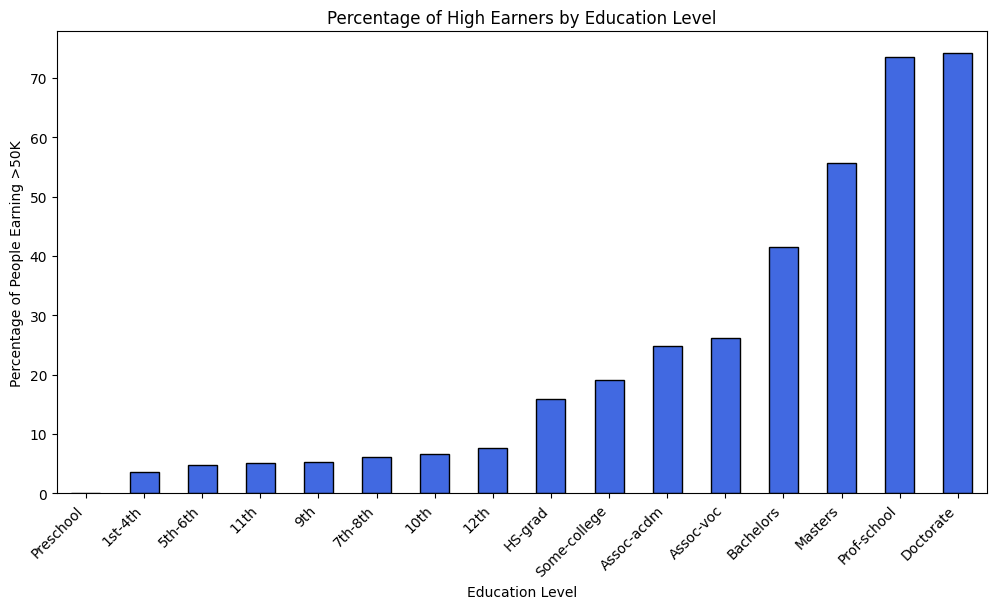

In [11]:
# Group by education and calculate the percentage of high earners
df_grouped_education = df.groupby(by='education')['income'].apply(lambda x: (x == '>50K').sum() / len(x) * 100)

# Plot the bar chart
plt.figure(figsize=(12, 6))
df_grouped_education.sort_values().plot(kind='bar', color='royalblue', edgecolor='black')

# Labels and title
plt.xlabel('Education Level')
plt.ylabel('Percentage of People Earning >50K')
plt.title('Percentage of High Earners by Education Level')
plt.xticks(rotation=45, ha='right')

# Show plot
plt.show()

The chart highlights a strong correlation between education level and income, with higher levels of education leading to a higher percentage of high earners. Doctorate and Prof-school holders have the highest percentages, at 74.09% and 73.44%, respectively, indicating substantial income potential in these fields. Conversely, individuals with lower education levels, such as those in Preschool and 1st-4th, show no or minimal high earners, emphasizing the financial benefits of attaining higher education.

##### **3.1.2 Income by Workclass**

In [16]:
# Group by workclass and calculate the percentage of high earners
df_grouped_workclass = df.groupby(by='workclass')

# Print total individuals per workclass
print('Total number of individuals per workclass:')
for val, grp in df_grouped_workclass:
    print(f'{val:<20}: {len(grp):>6} people')

print('---------------------------------------')
print('Percentage of People Earning >50K by Workclass:')
high_earners_percentage = (df_grouped_workclass['income'].apply(lambda x: (x == '>50K').sum()) 
                           / df_grouped_workclass['income'].count()) * 100

# Displaying percentages with better formatting
for workclass, percentage in high_earners_percentage.items():
    print(f'{workclass:<20}: {percentage:6.2f}%')


Total number of individuals per workclass:
Federal-gov         :    960 people
Local-gov           :   2093 people
Never-worked        :      7 people
Private             :  24509 people
Self-emp-inc        :   1116 people
Self-emp-not-inc    :   2540 people
State-gov           :   1298 people
Without-pay         :     14 people
---------------------------------------
Percentage of People Earning >50K by Workclass:
Federal-gov         :  38.65%
Local-gov           :  29.48%
Never-worked        :   0.00%
Private             :  21.02%
Self-emp-inc        :  55.73%
Self-emp-not-inc    :  28.50%
State-gov           :  27.20%
Without-pay         :   0.00%


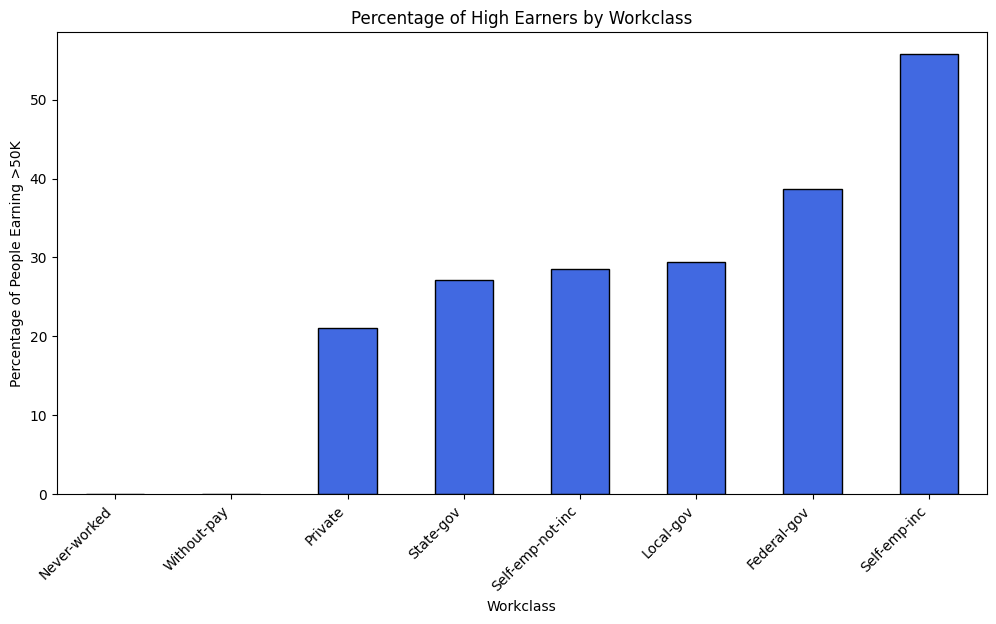

In [18]:
# Group by workclass and calculate the percentage of high earners
df_grouped_workclass = df.groupby(by='workclass')['income'].apply(lambda x: (x == '>50K').sum() / len(x) * 100)

# Plot the bar chart
plt.figure(figsize=(12, 6))
df_grouped_workclass.sort_values().plot(kind='bar', color='royalblue', edgecolor='black')

# Labels and title
plt.xlabel('Workclass')
plt.ylabel('Percentage of People Earning >50K')
plt.title('Percentage of High Earners by Workclass')
plt.xticks(rotation=45, ha='right')

# Show plot
plt.show()


The chart reveals that Self-emp-inc workers have the highest percentage of high earners at 55.73%, indicating that self-employment in incorporated businesses offers the most income potential. On the other hand, Never-worked and Without-pay categories show no high earners, highlighting the lack of income in unemployment or unpaid work. Government sectors like Federal-gov and Local-gov also exhibit relatively higher percentages, suggesting better income opportunities in these fields compared to Private and Self-emp-not-inc sectors.

##### **3.1.3 Age Distribution**

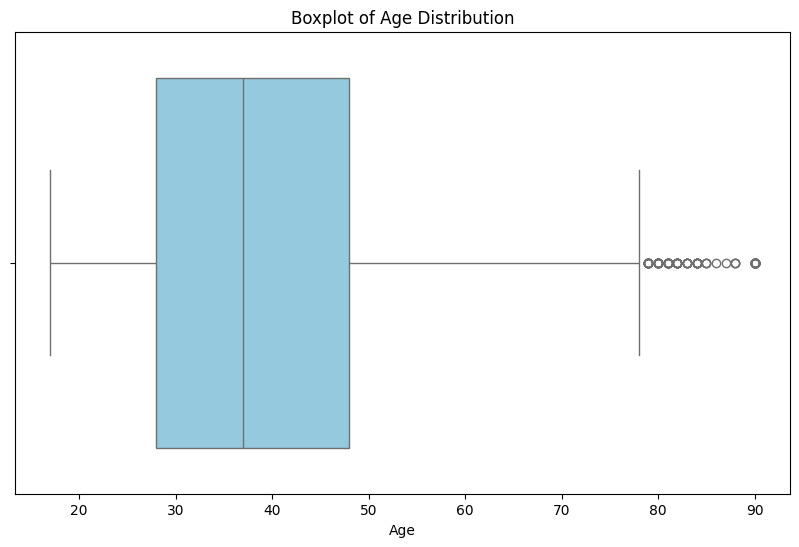

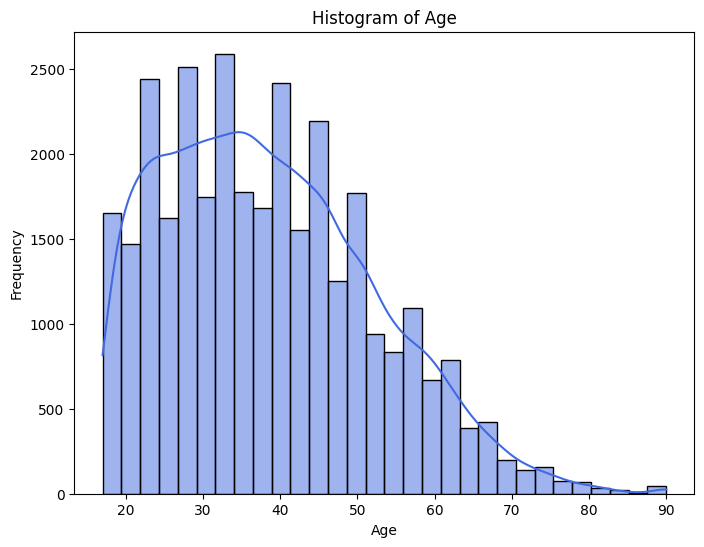

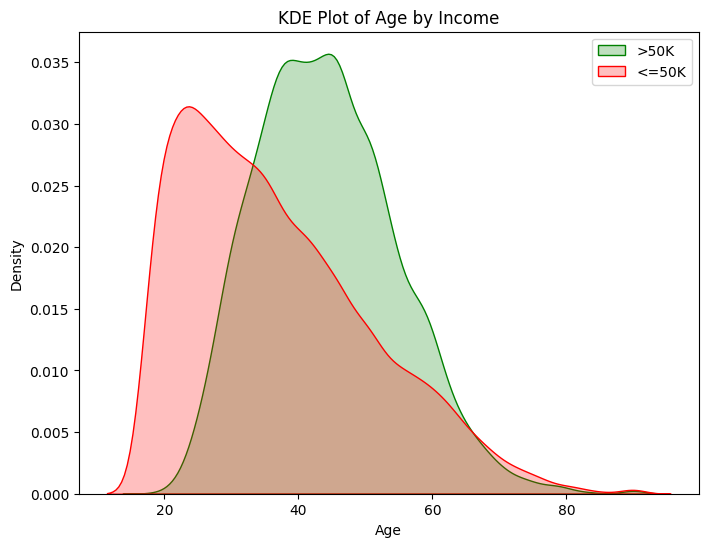

In [23]:

# Plotting boxplot for the 'age' feature
plt.figure(figsize=(10, 6))
sns.boxplot(x='age', data=df, color='skyblue')
plt.title('Boxplot of Age Distribution')
plt.xlabel('Age')
plt.show()

# Example of Histogram for Age
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], kde=True, color='royalblue', bins=30)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

# Example of KDE Plot for Income Distribution
plt.figure(figsize=(8, 6))
sns.kdeplot(df[df['income'] == '>50K']['age'], shade=True, color='green', label='>50K')
sns.kdeplot(df[df['income'] == '<=50K']['age'], shade=True, color='red', label='<=50K')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('KDE Plot of Age by Income')
plt.legend()
plt.show()


